# 该数据分析主要目标是通过分析指定数据，预测另一数据库中泰坦尼克号人员的幸存情况

In [1]:
#导入需要用到的所有的库/模块
#导入数据处理的库
import numpy as np
import pandas as pd
#导入可视化的库
import matplotlib.pyplot as plt
import seaborn as sns
#导入回归分析的库
import statsmodels.api as sm

In [2]:
#导入训练用dataframe
original_data = pd.read_csv("train.csv")
original_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#查看所有影响因素（列名）
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 可以看到数据表中给出的影响因素如下：
### PassengerId: 乘客id
### Survived：是否幸存
### Pclass：船仓等级
### Name：姓名
### Sex：性别
### Age：年龄
### SibSp：同乘伴侣
###  Parch：同城家人
### Ticket：船票号
### Fare：票价
### Cabin：船仓号
### Embarked：登船港口

# 初步分析：
### Fare：票价、Name：姓名、PassengerId: 乘客id、Embarked：登船港口。这三个因素大概率不会影响幸存结果，后续可优先排除。
### Parch：同城家人 和 SibSp：同乘伴侣。这两个因素之间可能相关性过大

# 评估并清洗数据

In [4]:
#新赋值一个变量
clean_data = original_data.copy()
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1、可以看到每一行都是一个实例，且每一列都代表一个变量，不存在数据结构性问题

## 2、检查是否存在数据缺失、重复等问题

In [5]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 由上可知，Age、Cabin、Embarked三列中存在遗漏
### PassengerId意义为乘客id信息，应该转变为字符串类型
### 按照变量意义，Survived、Sex、Pclass、Embarked应为分类变量

In [6]:
#先进行数据类型的转换
clean_data["PassengerId"] = clean_data["PassengerId"].astype("str")
clean_data["Survived"] = clean_data["Survived"].astype("category")
clean_data["Pclass"] = clean_data["Pclass"].astype("category")
clean_data["Sex"] = clean_data["Sex"].astype("category")
clean_data["Embarked"] = clean_data["Embarked"].astype("category")

In [7]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


# 处理缺失数据

In [8]:
#接下来处理缺失数据
clean_data[clean_data["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### 可以看到，总共有171个乘客的年龄缺失了，缺失数据太多了，且对于分析目标来说年龄应该是十分重要的特征，因此不能删去。最后处理：使用平均数进行填充

In [9]:
#在年龄缺失值中填充平均值
clean_data["Age"] = clean_data["Age"].fillna(clean_data["Age"].mean())
#检查一下
clean_data[clean_data["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 接下来对Cabin变量进行处理，该变量的意义是船舱号。
#### 这个变量或许会对预测有一定影响，应该尽量保留

In [10]:
#观察缺失数据
clean_data[clean_data["Cabin"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
#观察Cabin的其他数据
clean_data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

### 我没办法对这个变量进行填充，而且因为它的缺失值过多，有整整687条缺失项，我也无法将该变量去除。
### 只能暂时保留这些，后续进行分析后再做处理

### 对于Embarked变量，该变量对应的是登船港口。初步分析，该变量对于预测幸存没有帮助，或许可以删去

In [12]:
#查看缺失数量
clean_data[clean_data["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# 检查并处理重复数据

### 在所有变量中，只有PassengerId这个变量不允许有重复，所以只需要检查这个变量即可

In [13]:
clean_data["PassengerId"].duplicated().sum()

np.int64(0)

### 通过检查，发现PassengerId变量并不存在重复数据

# 检查并处理不一致数据

### 对于不一致数据，基本可能存在于分类变量中

In [14]:
clean_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
clean_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
clean_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
clean_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### 可以看出，并不存在不一致数据

# 检查是否有错误或无效数据

In [18]:
clean_data.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


### 初步看来几个数值变量都不存在无效数据

# 整理数据
### 以便后续分析

In [19]:
#观察dataframe
clean_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


#### 初步分析：SibSp 和 Parch	都是都是同乘成员数量的意义，会产生严重的相关性，且它们对幸存预测都有较大关联，可以考虑合并。以及 Pclass 和 Cabin 床舱等级和船舱号之间的相关性肯定很大，且船舱等级应该会在很大程度上影响幸存率，考虑去除缺失值大的cabin一列。

In [20]:
#合并SibSp 和 Parch 
clean_data["Num"] = clean_data["SibSp"] + clean_data["Parch"]
clean_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


# 可视化分析

In [21]:
#设置色盘
sns.set_palette("tab10")
#设置图表尺寸
plt.rcParams["figure.figsize"] = [7.00, 3.50]
#优化图表布局
plt.rcParams["figure.autolayout"] = True

## 查看一下幸存比例

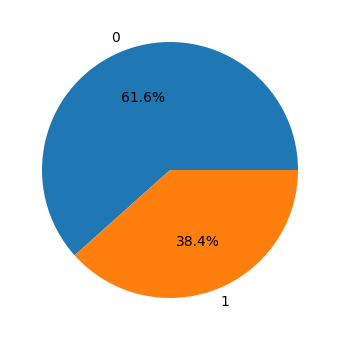

In [22]:
plt.pie(clean_data["Survived"].value_counts(), labels=clean_data["Survived"].value_counts().index, autopct="%.1f%%")
plt.show()

## 分类变量

## 查看一下船舱等级和船舱号分别和幸存情况的关系

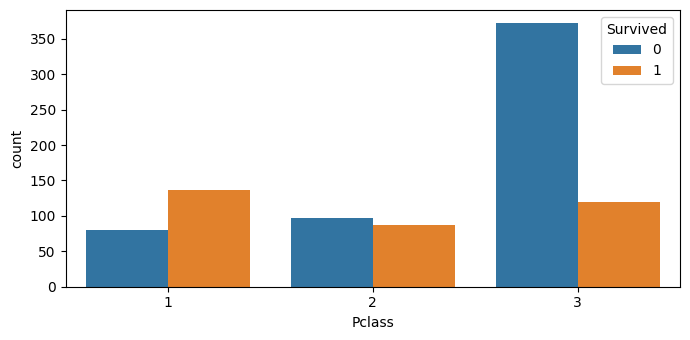

In [23]:
sns.countplot(clean_data, x="Pclass", hue="Survived")
plt.show()

#### 通过对Pclass的可视化图可以得出，一等舱的幸存者数量远远大于二等舱或三等舱的幸存者数量。船舱等级对于幸存有很大的影响

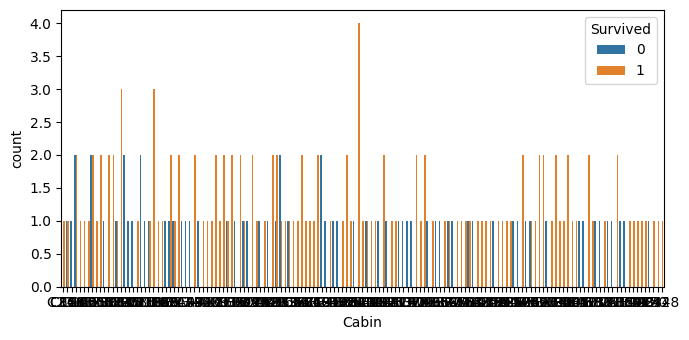

In [24]:
sns.countplot(clean_data, x="Cabin", hue="Survived")
plt.show()

#### 可以看到cabin一列因为缺失值过多，且没有相应的填充措施，得出来的可视化图也是无效的，因此可以考虑去除该变量，只保留Pclass变量。

## 查看上船港口和幸存的关系

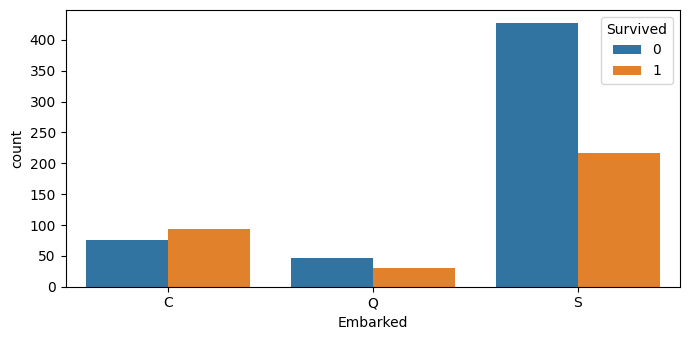

In [25]:
sns.countplot(clean_data, x="Embarked", hue="Survived")
plt.show()

([<matplotlib.patches.Wedge at 0x1ee6a3802d0>,
 [Text(-0.7128398816865827, 0.8377704357859967, 'S'),
  Text(0.4614526582133295, -0.9985296411363321, 'C'),
  Text(1.0595277266497123, -0.29563659526603386, 'Q')])

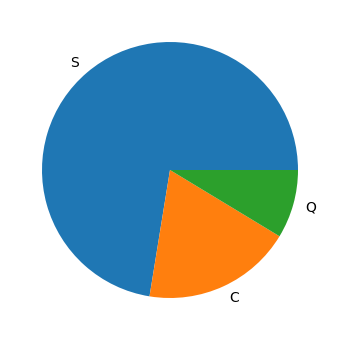

In [26]:
plt.pie(clean_data["Embarked"].value_counts(), labels=clean_data["Embarked"].value_counts().index)

#### 可以看出，三个不同的登船港口对于幸存是有一定影响的，但这也许的巧合。

## 查看性别不同和幸存的关系

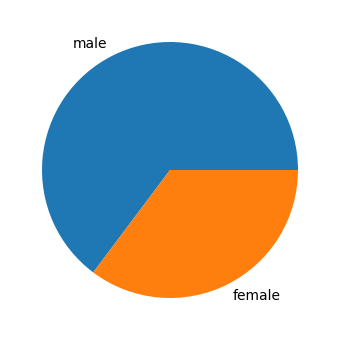

In [27]:
#看一看男女性别的数量占比
plt.pie(clean_data["Sex"].value_counts(), labels=clean_data["Sex"].value_counts().index)
plt.show()

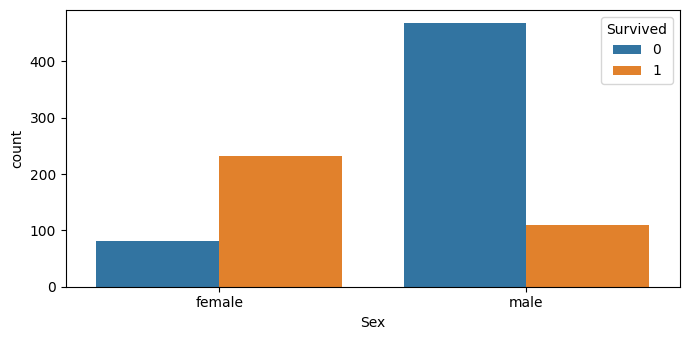

In [28]:
sns.countplot(clean_data, x="Sex", hue="Survived")
plt.show()

#### 从图中可以看到，性别不同，幸存的占比也明显不同

## 对于船票类型呢
### 这个变量大概率没有规律

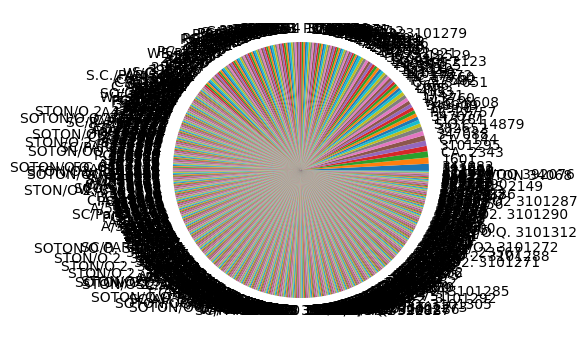

In [29]:
#看一下分布情况和种类数量
plt.pie(clean_data["Ticket"].value_counts(), labels=clean_data["Ticket"].value_counts().index)
plt.show()

#### 可以看到，船票名称有很多，完全无法进行分析。考虑删除

## 数值变量

## 查看一下fare（票价）的各种关系
#### 票价或许和船舱等级、同乘数量、登船港口以及票的名字均有关系。所以这里只进行初略分析，具体的相关性分析由后续的corr方法进行

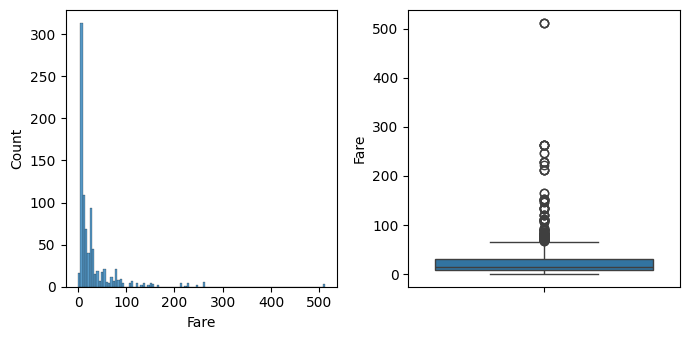

In [30]:
#票价的分布情况
figure, axes = plt.subplots(1, 2)
sns.histplot(clean_data, x="Fare", ax=axes[0])
sns.boxplot(clean_data, y="Fare", ax=axes[1])
plt.show()

#### 可以看到，绝大多数的票都集中在0-100元
#### 对于票价和幸存的关系无法在可视化中体现，不过它可能和船舱等级等有很强的相关性

## 年龄和幸存的关系

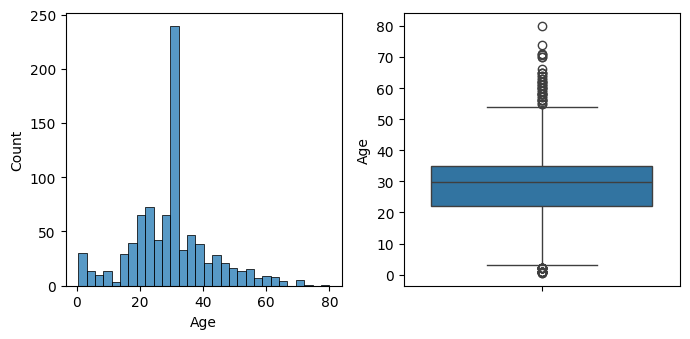

In [31]:
#看一下乘客年龄的分布
figure,axes = plt.subplots(1, 2)
sns.histplot(clean_data, x="Age", ax=axes[0])
sns.boxplot(clean_data, y="Age", ax=axes[1])
plt.show()

#### 大部分乘客都在20-40左右的年龄，但也有部分乘客属于较大年纪（60-80）以及较小年龄（0-10）

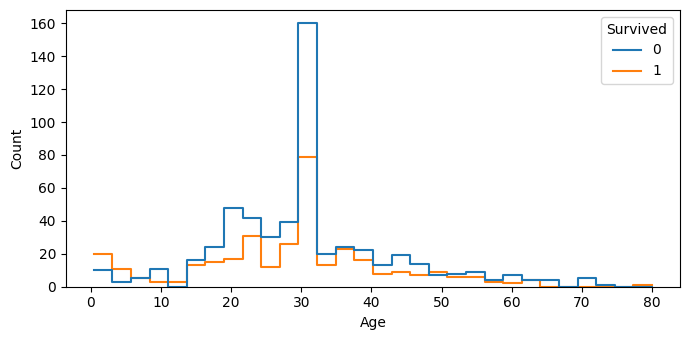

In [32]:
#年龄和幸存的关系
sns.histplot(clean_data, x="Age", hue="Survived", element="step", fill=False)
plt.show()

#### 可以看到，除了0-10和80这两个年龄组，其他的所有年龄组中都是遇难人数占比比幸存人数多

## 同乘数量和幸存的关系
#### 在这之前，我将SibSp 和 Parch 这两个都是代表同乘成员数量意义的变量进行了合并（组成了num变量来表示同乘成员数量），但这可能存在问题：根据dataframe意义，这个dataframe中存放着部分泰坦尼克号的成员信息，或许会出现如下例子中的情况：成员A拥有4名同乘成员BCDE，而在dataframe中也同时收录了BCDE的信息，而对于BCDE，他们的同乘成员数量也为4。这或许会对预测产生影响,因为这或许会导致模型对一个同乘团队的重复观察。
#### 或许不应该完全舍弃SibSp 和 Parch 这两个变量，它们有更多的信息价值。所以应该使用转化为分类变量并和原本的数值变量结合使用。

#### 第一步先分类出单独坐船的成员和非单独坐船的成员。引入分类变量alone，1代表是单独一人，0代表不是单独一人

In [33]:
clean_data["alone"] = clean_data["Num"].apply(lambda x:1 if x==0 else 0)
clean_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Num,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,1


#### 对是否为单独坐船的变量进行可视化分析

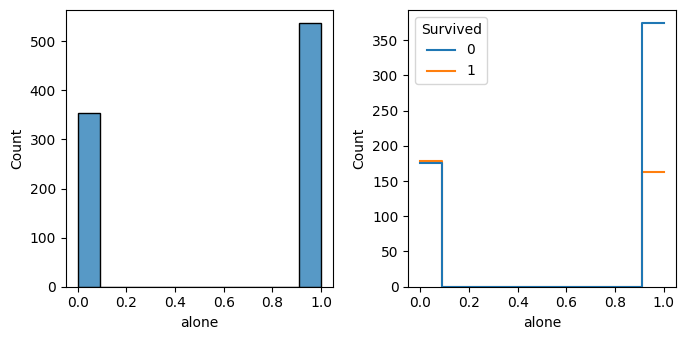

In [34]:
figure,axes = plt.subplots(1, 2)
sns.histplot(clean_data, x="alone", ax=axes[0])
sns.histplot(clean_data, x="alone", hue="Survived", element="step", fill=False, ax=axes[1])
plt.show()

#### 从上面的可视化图表中可以看出，1、单独一人坐船的人数要多于多人坐船。2、总体来看，相比于单独一人坐船，有同乘成员的坐船者幸存概率更大。

## 接下来观察不同数量的同乘成员对幸存的影响

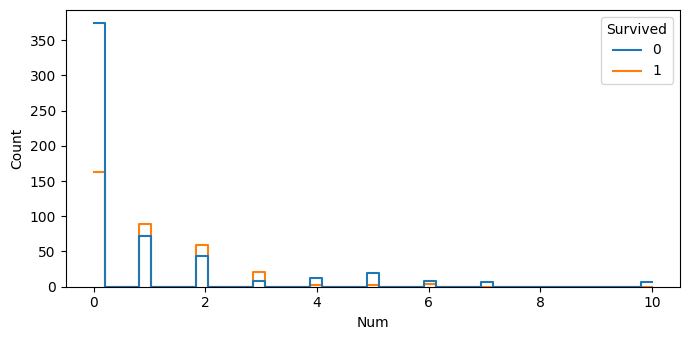

In [35]:
sns.histplot(clean_data, x="Num", hue="Survived", element="step", fill=False)
plt.show()

#### 可以看到，在有同乘成员的情况下，即Num>0的情况下同乘数量在1-3时，幸存人数多余遇难人数；而一旦同乘成员大于3，遇难人数便大于幸存人数

### 总结：考虑删去的变量有cabin、Ticket、PassengerId、Name，不确定是否应删去的变量Embarked。

# 数据分析预测

#### 根据需求，这属于二分类问题，应当使用逻辑回归、随机森林、决策树等机器学习方法来进行分析预测
#### 主要运用逻辑回归进行预测分析，在开头已经导入了其所需的模块。接下来将dataframe新赋值一个变量名以保护原dataframe

In [36]:
for_lr_data = clean_data.copy()
for_lr_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Num,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,1


#### 对于对幸存影响不显著的变量，进行去除

In [37]:
for_lr_data = for_lr_data.drop(["Cabin", "Ticket", "PassengerId", "Name"], axis=1)
for_lr_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Num,alone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


#### 对于分类变量，需引入虚拟变量用于表达

In [38]:
for_lr_data = pd.get_dummies(for_lr_data, drop_first=True, columns=["Pclass", "Sex", "Embarked"], dtype=int)
for_lr_data

,Survived,Age,SibSp,Parch,Fare,Num,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,1,0,0,1,1,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,1,0,1,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,0,0,1
4,0,35.000000,0,0,8.0500,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,1,0,1,0,1
887,1,19.000000,0,0,30.0000,0,1,0,0,0,0,1
888,0,29.699118,1,2,23.4500,3,0,0,1,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0


### 构建模型

In [39]:
y = for_lr_data["Survived"]
x = for_lr_data.drop(["Survived"], axis=1)
#对自变量进行相关性分析
x.corr()

,Age,SibSp,Parch,Fare,Num,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
Age,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.179775,0.006589,-0.281004,0.084153,-0.013855,-0.027121
SibSp,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.584471,-0.055932,0.092548,-0.114631,-0.026354,0.070941
Parch,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.583398,-0.000734,0.015790,-0.245489,-0.081228,0.063036
Fare,0.091566,0.159651,0.216225,1.000000,0.217138,-0.271832,-0.118557,-0.413333,-0.182333,-0.117216,-0.166603
Num,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.690922,-0.038594,0.071142,-0.200988,-0.058592,0.079977
alone,0.179775,-0.584471,-0.583398,-0.271832,-0.690922,1.000000,-0.039070,0.129472,0.303646,0.086464,0.024929
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,-0.039070,1.000000,-0.565210,-0.064746,-0.127301,0.192061
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,0.071142,0.129472,-0.565210,1.000000,0.137143,0.237449,-0.009511
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,0.303646,-0.064746,0.137143,1.000000,-0.074115,0.125722
Embarked_Q,-0.013855,-0.026354,-0.081228,-0.117216,-0.058592,0.086464,-0.127301,0.237449,-0.074115,1.000000,-0.496624


In [40]:
#计算各个自变量和应变量的相关性
for_lr_data.corr()

,Survived,Age,SibSp,Parch,Fare,Num,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.069809,-0.035322,0.081629,0.257307,0.016639,-0.203367,0.093349,-0.322308,-0.543351,0.003650,-0.155660
Age,-0.069809,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.179775,0.006589,-0.281004,0.084153,-0.013855,-0.027121
SibSp,-0.035322,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.584471,-0.055932,0.092548,-0.114631,-0.026354,0.070941
Parch,0.081629,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.583398,-0.000734,0.015790,-0.245489,-0.081228,0.063036
Fare,0.257307,0.091566,0.159651,0.216225,1.000000,0.217138,-0.271832,-0.118557,-0.413333,-0.182333,-0.117216,-0.166603
Num,0.016639,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.690922,-0.038594,0.071142,-0.200988,-0.058592,0.079977
alone,-0.203367,0.179775,-0.584471,-0.583398,-0.271832,-0.690922,1.000000,-0.039070,0.129472,0.303646,0.086464,0.024929
Pclass_2,0.093349,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,-0.039070,1.000000,-0.565210,-0.064746,-0.127301,0.192061
Pclass_3,-0.322308,-0.281004,0.092548,0.015790,-0.413333,0.071142,0.129472,-0.565210,1.000000,0.137143,0.237449,-0.009511
Sex_male,-0.543351,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,0.303646,-0.064746,0.137143,1.000000,-0.074115,0.125722


#### 通过计算得到自变量之间以及自变量和应变量的相关性
#### 结果显示，Sex_male (相关系数 -0.54) 是最重要的预测变量，表明男性乘客的生还率显著低于女性。Pclass_3 (-0.32) 和 Fare (0.26) 也显示出与生还率的中等程度相关性，乘客等级（三等舱）越低、票价越低，生还率也越低。alone (-0.20) 也有一定的负相关性，独自旅行的乘客生还率较低。
#### Age、SibSp、Parch 和 Num 单独来看与 Survived 的线性相关性非常弱（绝对值均小于 0.07）。然而，之前发现 SibSp、Parch 和 Num 之间存在高度多重共线性（相关系数 > 0.7），并且它们与 alone 也有中度相关性

### 接下来构建模型时，保留最重要的三个自变量：Sex_male, Pclass_3, Fare, alone
### 对于多重共线性变量：SibSp、Parch 和 Num，进行处理，考虑全部删去仅依靠alone变量来进行构建模型。因为三者对幸存的相关性都较低,且它们之间还存在严重的共线性问题
### 对于age和fare变量，再次进行可视化等分析，尝试进行分箱处理后再次分析其于幸存的相关性，以此判断如何纳入模型

In [41]:
#去除SibSp、Parch 和 Num三个自变量
x = x.drop(["SibSp", "Parch", "Num"], axis=1)
x

,Age,Fare,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,0,1,1,0,1
1,38.000000,71.2833,0,0,0,0,0,0
2,26.000000,7.9250,1,0,1,0,0,1
3,35.000000,53.1000,0,0,0,0,0,1
4,35.000000,8.0500,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,1,1,0,1,0,1
887,19.000000,30.0000,1,0,0,0,0,1
888,29.699118,23.4500,0,0,1,0,0,1
889,26.000000,30.0000,1,0,0,1,0,0


## 重新分析并处理Age和fare变量

<Axes: xlabel='Age', ylabel='Count'>

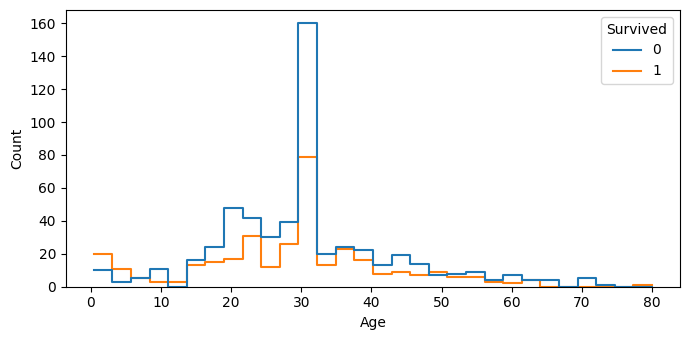

In [42]:
sns.histplot(clean_data, x="Age", hue="Survived", element="step", fill=False)

#### 考虑到年龄这一因素对幸存的影响或许并不是线性的，而是通过不同年龄段来影响幸存概率的。考虑将其进行分组，划分为儿童（<15）、青年（16-35）、中年（35-50）、老年（>51）

In [43]:
bins = [0, 15, 35, 50, np.inf]
# 对应的标签
labels = ['Child', 'Young', 'Middle-aged', 'Senior'] 
clean_data['AgeGroup'] = pd.cut(clean_data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
print(clean_data[['Age', 'AgeGroup']].head(10))

         Age     AgeGroup
0  22.000000        Young
1  38.000000  Middle-aged
2  26.000000        Young
3  35.000000        Young
4  35.000000        Young
5  29.699118        Young
6  54.000000       Senior
7   2.000000        Child
8  27.000000        Young
9  14.000000        Child


<Axes: xlabel='AgeGroup', ylabel='Count'>

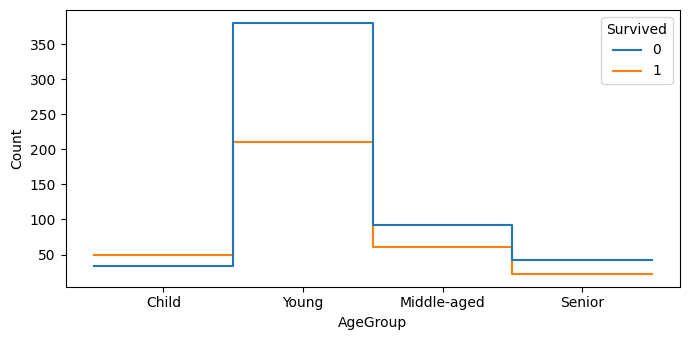

In [44]:
sns.histplot(clean_data, x="AgeGroup", hue="Survived", element="step", fill=False)

#### 可以看到，Child年龄组的成员幸存率远远大于其他年龄组，而其他年龄组的幸存情况也有一定的区别，这表明该年龄段分组对幸存有显著影响

In [45]:
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Num,alone,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Middle-aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Young


#### 将AgeGroup变量加入到for_lr_data数据表中

In [46]:
for_lr_data["AgeGroup"] = clean_data["AgeGroup"]
for_lr_data.head()

,Survived,Age,SibSp,Parch,Fare,Num,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup
0,0,22.0,1,0,7.2500,1,0,0,1,1,0,1,Young
1,1,38.0,1,0,71.2833,1,0,0,0,0,0,0,Middle-aged
2,1,26.0,0,0,7.9250,0,1,0,1,0,0,1,Young
3,1,35.0,1,0,53.1000,1,0,0,0,0,0,1,Young
4,0,35.0,0,0,8.0500,0,1,0,1,1,0,1,Young


In [47]:
for_lr_data = for_lr_data.drop(["SibSp", "Parch", "Num", "Age"], axis=1)
for_lr_data = pd.get_dummies(for_lr_data, drop_first=True, columns=["AgeGroup"], dtype=int)
for_lr_data.head()

,Survived,Fare,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior
0,0,7.2500,0,0,1,1,0,1,1,0,0
1,1,71.2833,0,0,0,0,0,0,0,1,0
2,1,7.9250,1,0,1,0,0,1,1,0,0
3,1,53.1000,0,0,0,0,0,1,1,0,0
4,0,8.0500,1,0,1,1,0,1,1,0,0


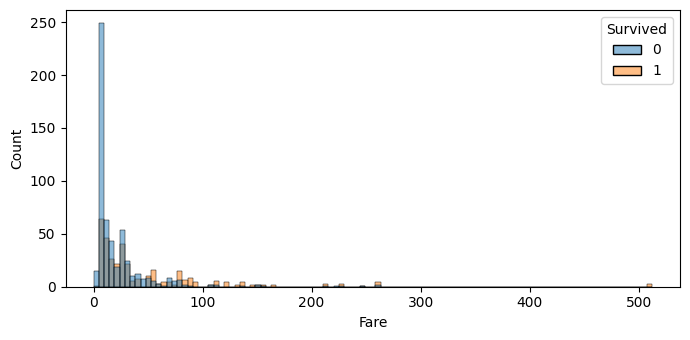

In [48]:
#票价的分布情况
sns.histplot(clean_data, x="Fare", hue="Survived")
plt.show()

<Axes: xlabel='Fare_log', ylabel='Count'>

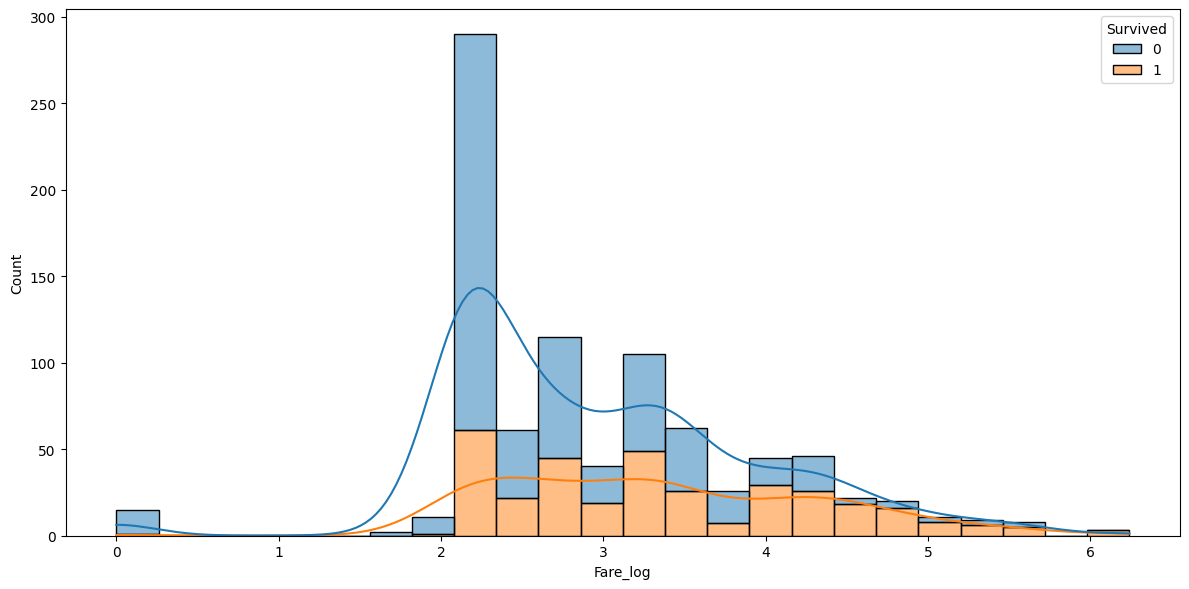

In [49]:
clean_data['Fare_log'] = np.log1p(clean_data['Fare'])

# 2. 绘制对数变换后的票价的直方图
plt.figure(figsize=(12, 6))
sns.histplot(data=clean_data, x="Fare_log", hue="Survived", multiple="stack", kde=True)

#### 根据以上图表，我尝试将票价分组为（0-100）、（100-300）、（>300）三组

In [50]:
bins = [0, 100, 300, np.inf]
# 对应的标签
labels = ['Cheap', 'Moderate', 'Expensive'] 
clean_data['FareGroup'] = pd.cut(clean_data['Fare'], bins=bins, labels=labels, right=True, include_lowest=True)
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Num,alone,AgeGroup,Fare_log,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,Young,2.110213,Cheap
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Middle-aged,4.280593,Cheap
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Young,2.188856,Cheap
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Young,3.990834,Cheap
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Young,2.202765,Cheap


<Axes: xlabel='FareGroup', ylabel='Count'>

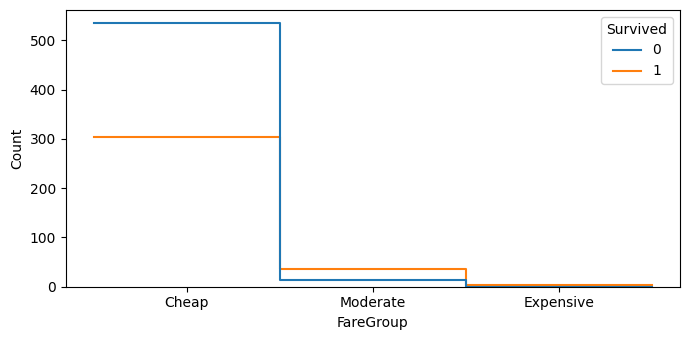

In [51]:
sns.histplot(clean_data, x="FareGroup", hue="Survived", element="step", fill=False)

In [52]:
for_lr_data["FareGroup"] = clean_data["FareGroup"]
for_lr_data.head()

,Survived,Fare,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior,FareGroup
0,0,7.2500,0,0,1,1,0,1,1,0,0,Cheap
1,1,71.2833,0,0,0,0,0,0,0,1,0,Cheap
2,1,7.9250,1,0,1,0,0,1,1,0,0,Cheap
3,1,53.1000,0,0,0,0,0,1,1,0,0,Cheap
4,0,8.0500,1,0,1,1,0,1,1,0,0,Cheap


In [53]:
for_lr_data = for_lr_data.drop(["Fare"], axis=1)
for_lr_data = pd.get_dummies(for_lr_data, drop_first=True, columns=["FareGroup"], dtype=int)
for_lr_data.head(10)

,Survived,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior,FareGroup_Moderate,FareGroup_Expensive
0,0,0,0,1,1,0,1,1,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0
2,1,1,0,1,0,0,1,1,0,0,0,0
3,1,0,0,0,0,0,1,1,0,0,0,0
4,0,1,0,1,1,0,1,1,0,0,0,0
5,0,1,0,1,1,1,0,1,0,0,0,0
6,0,1,0,0,1,0,1,0,0,1,0,0
7,0,0,0,1,1,0,1,0,0,0,0,0
8,1,0,0,1,0,0,1,1,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,0,0


#### 重新进行模型构建和相关性分析

In [54]:
y = for_lr_data["Survived"]
x = for_lr_data.drop(["Survived"], axis=1)
#对自变量进行相关性分析
x.corr()

,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior,FareGroup_Moderate,FareGroup_Expensive
alone,1.000000,-0.039070,0.129472,0.303646,0.086464,0.024929,0.246585,-0.068187,0.039329,-0.160793,0.007599
Pclass_2,-0.039070,1.000000,-0.565210,-0.064746,-0.127301,0.192061,-0.041344,0.025025,0.019150,-0.124390,-0.029652
Pclass_3,0.129472,-0.565210,1.000000,0.137143,0.237449,-0.009511,0.211617,-0.187353,-0.220820,-0.270146,-0.064397
Sex_male,0.303646,-0.064746,0.137143,1.000000,-0.074115,0.125722,0.051086,-0.012962,0.050538,-0.156993,0.002321
Embarked_Q,0.086464,-0.127301,0.237449,-0.074115,1.000000,-0.496624,0.117704,-0.097675,-0.039151,-0.074993,-0.017877
Embarked_S,0.024929,0.192061,-0.009511,0.125722,-0.496624,1.000000,-0.038014,0.055940,-0.012217,-0.132249,-0.093853
AgeGroup_Young,0.246585,-0.041344,0.211617,0.051086,0.117704,-0.038014,1.000000,-0.639073,-0.390454,-0.084255,0.000414
AgeGroup_Middle-aged,-0.068187,0.025025,-0.187353,-0.012962,-0.097675,0.055940,-0.639073,1.000000,-0.126664,0.095870,0.024908
AgeGroup_Senior,0.039329,0.019150,-0.220820,0.050538,-0.039151,-0.012217,-0.390454,-0.126664,1.000000,0.007716,-0.016169
FareGroup_Moderate,-0.160793,-0.124390,-0.270146,-0.156993,-0.074993,-0.132249,-0.084255,0.095870,0.007716,1.000000,-0.014172


In [55]:
x.corr().abs() > 0.5

,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior,FareGroup_Moderate,FareGroup_Expensive
alone,True,False,False,False,False,False,False,False,False,False,False
Pclass_2,False,True,True,False,False,False,False,False,False,False,False
Pclass_3,False,True,True,False,False,False,False,False,False,False,False
Sex_male,False,False,False,True,False,False,False,False,False,False,False
Embarked_Q,False,False,False,False,True,False,False,False,False,False,False
Embarked_S,False,False,False,False,False,True,False,False,False,False,False
AgeGroup_Young,False,False,False,False,False,False,True,True,False,False,False
AgeGroup_Middle-aged,False,False,False,False,False,False,True,True,False,False,False
AgeGroup_Senior,False,False,False,False,False,False,False,False,True,False,False
FareGroup_Moderate,False,False,False,False,False,False,False,False,False,True,False


### 由以上数据可以得出以下的初步结论
#### 最强烈的正相关是 alone 和 Sex_male (男性乘客更容易独自出行)。年轻乘客也比其他年龄段更容易独自出行。三等舱的乘客比其他舱等的乘客更容易独自出行。中等票价的乘客不太可能独自出行，这表明他们更有可能是家庭或团体成员。三等舱与从（Q）港口登船的乘客高度相关。二等舱与从（S）港口登船的乘客有一定关联。
#### AgeGroup_Young 和 AgeGroup_Middle-aged 之间有很强的负相关性，表示该年龄分组是合理的
#### FareGroup_Moderate 与其他一些特征（如 alone, Sex_male, Pclass_3）呈现负相关，表明中等价位船票的乘客可能有着不同的出行模式。

### 关于共线性的分析
#### 最高的相关性是 AgeGroup_Young 和 AgeGroup_Middle-aged 之间的 -0.639073。其次是 Pclass_2 和 Pclass_3 之间的 -0.565210。再次是 Embarked_Q 和 Embarked_S 之间的 -0.496624。
#### 但这些变量的强负相关性的出现是因为它们本身具有明确的互斥意义，因此它们之间不存在严重共线性。

### 纳入截距

In [56]:
x = sm.add_constant(x)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
# 使用 .values 获取 numpy 数组，statsmodels 需要numpy数组
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print("方差膨胀因子 (VIF) 表:")
print(vif_data)

方差膨胀因子 (VIF) 表:
                 feature        VIF
0                  const  21.226828
1                  alone   1.295469
2               Pclass_2   1.870251
3               Pclass_3   2.265413
4               Sex_male   1.154759
5             Embarked_Q   1.493359
6             Embarked_S   1.495875
7         AgeGroup_Young   3.208991
8   AgeGroup_Middle-aged   2.688839
9        AgeGroup_Senior   1.972717
10    FareGroup_Moderate   1.284889
11   FareGroup_Expensive   1.028078


#### 通过vif分析，得出该组特征并不存在严重的共线性问题

### 进行逻辑回归分析

In [58]:
model = sm.Logit(y, x).fit()
model.summary()

         Current function value: 0.443024
         Iterations: 35


C:\Users\阿道夫\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                  0.3347
Time:                        08:57:20   Log-Likelihood:                -394.73
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.420e-78
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0772      0.434      9.398      0.000       3.227       4.928
alone                    0.1438      0.203      0.707      0.480      -0.255       0.542
Pclass_2                -1.0026      0.280     -3.582      0.000      -1.551      -0.454
Pclass_3                -2.3460      0.271     -8.644      0.000      -2.878      -1.814
Sex_male                -2.6362      0.198    -13.283      0.000      -3.025      -2.247
Embarked_Q              -0.0108      0.374     -0.029      0.977      -0.744       0.722
Embarked_S              -0.5192      0.237     -2.187      0.029      -0.984      -0.054
AgeGroup_Young          -1.2067      0.325     -3.717      0.000      -1.843      -0.570
AgeGroup_Middle-aged    -1.6338      0.378     -4.324      0.000      -2.374      -0.893
AgeGroup_Senior         -2.1393      0.477     -4.488      0.000      -3.074      -1.205
FareGroup_Moderate      -0.4046      0.435     -0.930      0.353      -1.258       0.449
FareGroup_Expensive     21.5868   3.49e+04      0.001      1.000   -6.84e+04    6.84e+04
========================================================================================
"""

#### 无法收敛的原因应该是高票价的样本数量太少了，尝试考虑合并或重新分箱

In [59]:
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Num,alone,AgeGroup,Fare_log,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,Young,2.110213,Cheap
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Middle-aged,4.280593,Cheap
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Young,2.188856,Cheap
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Young,3.990834,Cheap
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Young,2.202765,Cheap


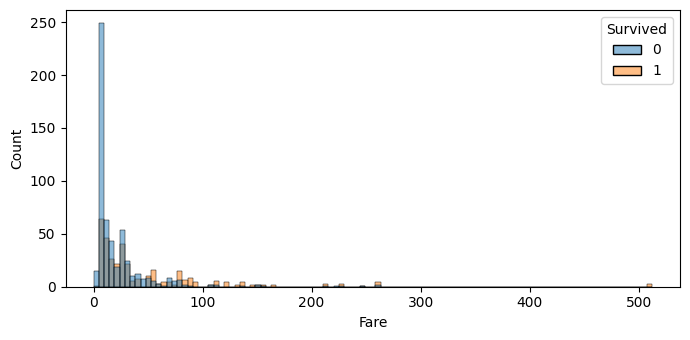

In [60]:
sns.histplot(clean_data, x="Fare", hue="Survived")
plt.show()

#### 由图可知，票价主要集中在0-100。之前我尝试将票价分组为（0-100）、（100-300）、（>300）三组
#### 将（100-300）、（>300）两组进行合并以增加样本量

In [61]:
bins = [0, 100, np.inf]
# 对应的标签
labels = ['Cheap', 'Expensive'] 
clean_data['FareGroup'] = pd.cut(clean_data['Fare'], bins=bins, labels=labels, right=True, include_lowest=True)
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Num,alone,AgeGroup,Fare_log,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,Young,2.110213,Cheap
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Middle-aged,4.280593,Cheap
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Young,2.188856,Cheap
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Young,3.990834,Cheap
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Young,2.202765,Cheap


<Axes: xlabel='FareGroup', ylabel='Count'>

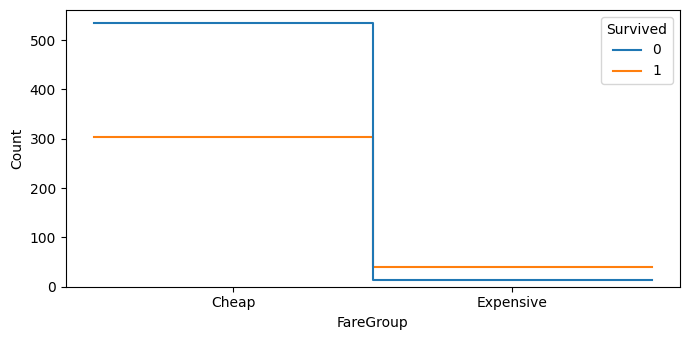

In [62]:
sns.histplot(clean_data, x="FareGroup", hue="Survived", element="step", fill=False)

In [63]:
for_lr_data = for_lr_data.drop(["FareGroup_Moderate", "FareGroup_Expensive"], axis=1)
for_lr_data["FareGroup"] = clean_data["FareGroup"]
for_lr_data = pd.get_dummies(for_lr_data, drop_first=True, columns=["FareGroup"], dtype=int)
for_lr_data.head(10)

,Survived,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior,FareGroup_Expensive
0,0,0,0,1,1,0,1,1,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,0,1,1,0,0,0
3,1,0,0,0,0,0,1,1,0,0,0
4,0,1,0,1,1,0,1,1,0,0,0
5,0,1,0,1,1,1,0,1,0,0,0
6,0,1,0,0,1,0,1,0,0,1,0
7,0,0,0,1,1,0,1,0,0,0,0
8,1,0,0,1,0,0,1,1,0,0,0
9,1,0,1,0,0,0,0,0,0,0,0


### 再次构建模型和相关性分析

In [64]:
y = for_lr_data["Survived"]
X = for_lr_data.drop(["Survived"], axis=1)
#对自变量进行相关性分析
X.corr()

,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior,FareGroup_Expensive
alone,1.000000,-0.039070,0.129472,0.303646,0.086464,0.024929,0.246585,-0.068187,0.039329,-0.154594
Pclass_2,-0.039070,1.000000,-0.565210,-0.064746,-0.127301,0.192061,-0.041344,0.025025,0.019150,-0.128297
Pclass_3,0.129472,-0.565210,1.000000,0.137143,0.237449,-0.009511,0.211617,-0.187353,-0.220820,-0.278629
Sex_male,0.303646,-0.064746,0.137143,1.000000,-0.074115,0.125722,0.051086,-0.012962,0.050538,-0.152189
Embarked_Q,0.086464,-0.127301,0.237449,-0.074115,1.000000,-0.496624,0.117704,-0.097675,-0.039151,-0.077348
Embarked_S,0.024929,0.192061,-0.009511,0.125722,-0.496624,1.000000,-0.038014,0.055940,-0.012217,-0.151667
AgeGroup_Young,0.246585,-0.041344,0.211617,0.051086,0.117704,-0.038014,1.000000,-0.639073,-0.390454,-0.081881
AgeGroup_Middle-aged,-0.068187,0.025025,-0.187353,-0.012962,-0.097675,0.055940,-0.639073,1.000000,-0.126664,0.099384
AgeGroup_Senior,0.039329,0.019150,-0.220820,0.050538,-0.039151,-0.012217,-0.390454,-0.126664,1.000000,0.003548
FareGroup_Expensive,-0.154594,-0.128297,-0.278629,-0.152189,-0.077348,-0.151667,-0.081881,0.099384,0.003548,1.000000


### 纳入新截距

In [65]:
X = sm.add_constant(x)

### 重新计算vif

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# 使用 .values 获取 numpy 数组，statsmodels 需要numpy数组
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("方差膨胀因子 (VIF) 表:")
print(vif_data)

方差膨胀因子 (VIF) 表:
                 feature        VIF
0                  const  21.226828
1                  alone   1.295469
2               Pclass_2   1.870251
3               Pclass_3   2.265413
4               Sex_male   1.154759
5             Embarked_Q   1.493359
6             Embarked_S   1.495875
7         AgeGroup_Young   3.208991
8   AgeGroup_Middle-aged   2.688839
9        AgeGroup_Senior   1.972717
10    FareGroup_Moderate   1.284889
11   FareGroup_Expensive   1.028078


### 可以看到，该组特征也不存在严重的共线性问题，可以进行逻辑回归分析

In [67]:
model = sm.Logit(y, X).fit()
model.summary()

         Current function value: 0.443024
         Iterations: 35


C:\Users\阿道夫\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                  0.3347
Time:                        08:57:21   Log-Likelihood:                -394.73
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.420e-78
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0772      0.434      9.398      0.000       3.227       4.928
alone                    0.1438      0.203      0.707      0.480      -0.255       0.542
Pclass_2                -1.0026      0.280     -3.582      0.000      -1.551      -0.454
Pclass_3                -2.3460      0.271     -8.644      0.000      -2.878      -1.814
Sex_male                -2.6362      0.198    -13.283      0.000      -3.025      -2.247
Embarked_Q              -0.0108      0.374     -0.029      0.977      -0.744       0.722
Embarked_S              -0.5192      0.237     -2.187      0.029      -0.984      -0.054
AgeGroup_Young          -1.2067      0.325     -3.717      0.000      -1.843      -0.570
AgeGroup_Middle-aged    -1.6338      0.378     -4.324      0.000      -2.374      -0.893
AgeGroup_Senior         -2.1393      0.477     -4.488      0.000      -3.074      -1.205
FareGroup_Moderate      -0.4046      0.435     -0.930      0.353      -1.258       0.449
FareGroup_Expensive     21.5868   3.49e+04      0.001      1.000   -6.84e+04    6.84e+04
========================================================================================
"""

#### 仍然存在不能收敛的问题，还是票价这一特征的问题。不过由回归分析所示，可以得出结果：票价对幸存没用显著性影响，并且票价和船舱等级具有一定的相关性，或许考虑删除该特征

### 删除票价这一特征，并重新构建模型

In [68]:
for_lr_data = for_lr_data.drop(["FareGroup_Expensive"], axis=1)

In [69]:
for_lr_data.head()

,Survived,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior
0,0,0,0,1,1,0,1,1,0,0
1,1,0,0,0,0,0,0,0,1,0
2,1,1,0,1,0,0,1,1,0,0
3,1,0,0,0,0,0,1,1,0,0
4,0,1,0,1,1,0,1,1,0,0


In [70]:
y = for_lr_data['Survived']
X = for_lr_data.drop(['Survived'], axis=1)
X.corr()

,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior
alone,1.000000,-0.039070,0.129472,0.303646,0.086464,0.024929,0.246585,-0.068187,0.039329
Pclass_2,-0.039070,1.000000,-0.565210,-0.064746,-0.127301,0.192061,-0.041344,0.025025,0.019150
Pclass_3,0.129472,-0.565210,1.000000,0.137143,0.237449,-0.009511,0.211617,-0.187353,-0.220820
Sex_male,0.303646,-0.064746,0.137143,1.000000,-0.074115,0.125722,0.051086,-0.012962,0.050538
Embarked_Q,0.086464,-0.127301,0.237449,-0.074115,1.000000,-0.496624,0.117704,-0.097675,-0.039151
Embarked_S,0.024929,0.192061,-0.009511,0.125722,-0.496624,1.000000,-0.038014,0.055940,-0.012217
AgeGroup_Young,0.246585,-0.041344,0.211617,0.051086,0.117704,-0.038014,1.000000,-0.639073,-0.390454
AgeGroup_Middle-aged,-0.068187,0.025025,-0.187353,-0.012962,-0.097675,0.055940,-0.639073,1.000000,-0.126664
AgeGroup_Senior,0.039329,0.019150,-0.220820,0.050538,-0.039151,-0.012217,-0.390454,-0.126664,1.000000


### 纳入截距

In [71]:
X = sm.add_constant(X)

In [72]:
vif_data = pd.DataFrame()
X_with_const = sm.add_constant(X)
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
vif_data

,feature,VIF
0,const,18.523735
1,alone,1.288170
2,Pclass_2,1.658771
3,Pclass_3,1.946771
4,Sex_male,1.145971
5,Embarked_Q,1.485689
6,Embarked_S,1.473682
7,AgeGroup_Young,3.208269
8,AgeGroup_Middle-aged,2.688350
9,AgeGroup_Senior,1.957805


#### 可以看到，vif结果显示目前特征不存在显著的共线性问题，可以进行逻辑回归分析

In [73]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.445105
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                  0.3316
Time:                        08:57:21   Log-Likelihood:                -396.59
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.373e-79
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0002      0.411      9.723      0.000       3.194       4.807
alone                    0.1620      0.202      0.802      0.422      -0.234       0.558
Pclass_2                -0.9441      0.266     -3.546      0.000      -1.466      -0.422
Pclass_3                -2.2829      0.254     -8.971      0.000      -2.782      -1.784
Sex_male                -2.6152      0.198    -13.224      0.000      -3.003      -2.228
Embarked_Q              -0.0221      0.372     -0.059      0.953      -0.751       0.707
Embarked_S              -0.5344      0.235     -2.274      0.023      -0.995      -0.074
AgeGroup_Young          -1.2016      0.325     -3.699      0.000      -1.838      -0.565
AgeGroup_Middle-aged    -1.6106      0.377     -4.273      0.000      -2.349      -0.872
AgeGroup_Senior         -2.1224      0.475     -4.472      0.000      -3.053      -1.192
========================================================================================
"""

### 现在还有一个问题，通过阅读kaggle官方文档和评论区，我发现我对年龄缺失值的处理并不妥当，我使用了直接用平均值来进行填充。而官方文档选择了使用根据Pclass分组，分别进行计算中位数来填充的方法。进行相应修改

In [74]:
#根据Pclass分组，分别进行计算中位数并填充
clean_data_filled_age = original_data.copy()
clean_data_filled_age['Age'] = clean_data_filled_age.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
clean_data_filled_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Count'>

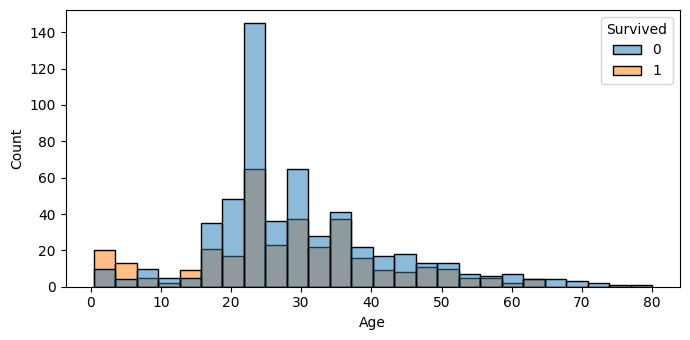

In [75]:
sns.histplot(clean_data_filled_age, x="Age", hue="Survived")

In [76]:
for_lr_data.head()

,Survived,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior
0,0,0,0,1,1,0,1,1,0,0
1,1,0,0,0,0,0,0,0,1,0
2,1,1,0,1,0,0,1,1,0,0
3,1,0,0,0,0,0,1,1,0,0
4,0,1,0,1,1,0,1,1,0,0


In [77]:
for_lr_data = for_lr_data.drop(["AgeGroup_Young", "AgeGroup_Senior", "AgeGroup_Middle-aged"], axis=1)
for_lr_data.head()

,Survived,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,1
1,1,0,0,0,0,0,0
2,1,1,0,1,0,0,1
3,1,0,0,0,0,0,1
4,0,1,0,1,1,0,1


In [78]:
#重新分组
bins = [0, 12, 25, 55, np.inf]
# 对应的标签
labels = ['Child', 'Young', 'Middle-aged', 'Senior'] 
clean_data_filled_age['AgeGroup'] = pd.cut(clean_data_filled_age['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
print(clean_data_filled_age[['Age', 'AgeGroup']].head(10))

    Age     AgeGroup
0  22.0        Young
1  38.0  Middle-aged
2  26.0  Middle-aged
3  35.0  Middle-aged
4  35.0  Middle-aged
5  24.0        Young
6  54.0  Middle-aged
7   2.0        Child
8  27.0  Middle-aged
9  14.0        Young


In [79]:
for_lr_data["Age"] = clean_data_filled_age['Age']
for_lr_data["AgeGroup"] = clean_data_filled_age['AgeGroup']
for_lr_data.head()

,Survived,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age,AgeGroup
0,0,0,0,1,1,0,1,22.0,Young
1,1,0,0,0,0,0,0,38.0,Middle-aged
2,1,1,0,1,0,0,1,26.0,Middle-aged
3,1,0,0,0,0,0,1,35.0,Middle-aged
4,0,1,0,1,1,0,1,35.0,Middle-aged


In [80]:
for_lr_data = pd.get_dummies(for_lr_data, drop_first=True, columns=["AgeGroup"], dtype=int)
for_lr_data = for_lr_data.drop(["Age"], axis=1)
for_lr_data.head()

,Survived,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior
0,0,0,0,1,1,0,1,1,0,0
1,1,0,0,0,0,0,0,0,1,0
2,1,1,0,1,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,1,0
4,0,1,0,1,1,0,1,0,1,0


### 重新构建模型

In [81]:
y = for_lr_data['Survived']
X = for_lr_data.drop(['Survived'], axis=1)
X.corr()

,alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior
alone,1.000000,-0.039070,0.129472,0.303646,0.086464,0.024929,0.108110,0.048216,0.065264
Pclass_2,-0.039070,1.000000,-0.565210,-0.064746,-0.127301,0.192061,-0.157642,0.147343,-0.016876
Pclass_3,0.129472,-0.565210,1.000000,0.137143,0.237449,-0.009511,0.362994,-0.335435,-0.163922
Sex_male,0.303646,-0.064746,0.137143,1.000000,-0.074115,0.125722,-0.011032,0.023077,0.057823
Embarked_Q,0.086464,-0.127301,0.237449,-0.074115,1.000000,-0.496624,0.212523,-0.190429,-0.008811
Embarked_S,0.024929,0.192061,-0.009511,0.125722,-0.496624,1.000000,-0.122134,0.119485,-0.047361
AgeGroup_Young,0.108110,-0.157642,0.362994,-0.011032,0.212523,-0.122134,1.000000,-0.781473,-0.181860
AgeGroup_Middle-aged,0.048216,0.147343,-0.335435,0.023077,-0.190429,0.119485,-0.781473,1.000000,-0.201979
AgeGroup_Senior,0.065264,-0.016876,-0.163922,0.057823,-0.008811,-0.047361,-0.181860,-0.201979,1.000000


In [82]:
X = sm.add_constant(X)

In [83]:
vif_data = pd.DataFrame()
X_with_const = sm.add_constant(X)
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
vif_data

,feature,VIF
0,const,21.757333
1,alone,1.286662
2,Pclass_2,1.646983
3,Pclass_3,2.041877
4,Sex_male,1.148054
5,Embarked_Q,1.488054
6,Embarked_S,1.477598
7,AgeGroup_Young,4.248663
8,AgeGroup_Middle-aged,4.479078
9,AgeGroup_Senior,1.769423


#### 没有发现严重共线性问题，进行逻辑回归分析

In [84]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.445847
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                  0.3305
Time:                        08:57:21   Log-Likelihood:                -397.25
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.459e-79
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.1323      0.439      9.415      0.000       3.272       4.993
alone                    0.2388      0.202      1.180      0.238      -0.158       0.635
Pclass_2                -0.8712      0.264     -3.306      0.001      -1.388      -0.355
Pclass_3                -2.1392      0.258     -8.291      0.000      -2.645      -1.634
Sex_male                -2.6633      0.200    -13.307      0.000      -3.056      -2.271
Embarked_Q              -0.1007      0.370     -0.272      0.786      -0.826       0.625
Embarked_S              -0.6506      0.235     -2.770      0.006      -1.111      -0.190
AgeGroup_Young          -1.4523      0.358     -4.055      0.000      -2.154      -0.750
AgeGroup_Middle-aged    -1.4393      0.361     -3.983      0.000      -2.148      -0.731
AgeGroup_Senior         -2.4401      0.567     -4.307      0.000      -3.550      -1.330
========================================================================================
"""

In [85]:
print("Pclass_2_OR:")
print(np.exp(-0.8712))
print("Pclass_3_OR:")
print(np.exp(-2.1392))
print("Sex_male_OR:")
print(np.exp(-2.6633))
print("Embarked_S_OR:")
print(np.exp(-0.6506))
print("AgeGroup_Young_OR:")
print(np.exp(-1.4523))
print("AgeGroup_Middle-aged_OR:")
print(np.exp(-1.4393))
print("AgeGroup_Senior_OR:")
print(np.exp(-2.4401))

Pclass_2_OR:
0.41844910891303544
Pclass_3_OR:
0.11774900455578825
Sex_male_OR:
0.06971777306235594
Embarked_S_OR:
0.5217326432444085
AgeGroup_Young_OR:
0.23403139639419787
AgeGroup_Middle-aged_OR:
0.23709366617404684
AgeGroup_Senior_OR:
0.0871521358126248


### 该模型显示信息如下：
#### alone (P=0.238): 不显著。独自一人的乘客与非独自一人的乘客在生存率上没有统计学上的显著差异。
#### Pclass_2和Pclass_3都有显著的负向影响，比Pclass_1的幸存率低。其中二等舱生存几率约是一等舱的 41.8%，三等舱生存几率约是一等舱的 11.8%。
#### Sex_male也存在显著的负向影响，男性的幸存概率比女性低，男性生存几率约是女性的 7.0%
#### Embarked_Q (-0.1007, P=0.786): 不显著，从Embarked_Q登船的乘客与从 Embarked_C 登船的乘客在生存率上无显著差异。
#### Embarked_S存在显著负向影响，从 Embarked_S 登船的乘客生存几率约是 Embarked_C 登船乘客的 52.2%。
#### 对于年龄四个不同的年龄组，Young 组、Middle-aged 组、Senior 组的幸存率和Child 组相比均显著降低：
#### Young 组（12-24岁）的生存率是 Child 组的23.4%。Middle-aged 组（25-54岁）的生存率是 Child 组的23.7%。Senior 组（55岁以上）的生存率是 Child 组的8.71%

#### Embarked_Q的影响并不显著，可以将其去除，再次建立模型

In [86]:
X = X.drop(["Embarked_Q"],axis=1)
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.445889
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                  0.3304
Time:                        08:57:21   Log-Likelihood:                -397.29
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.251e-80
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.1080      0.429      9.581      0.000       3.268       4.948
alone                    0.2315      0.200      1.155      0.248      -0.161       0.624
Pclass_2                -0.8778      0.262     -3.347      0.001      -1.392      -0.364
Pclass_3                -2.1540      0.252     -8.541      0.000      -2.648      -1.660
Sex_male                -2.6576      0.199    -13.365      0.000      -3.047      -2.268
Embarked_S              -0.6185      0.203     -3.042      0.002      -1.017      -0.220
AgeGroup_Young          -1.4535      0.358     -4.065      0.000      -2.154      -0.753
AgeGroup_Middle-aged    -1.4361      0.361     -3.981      0.000      -2.143      -0.729
AgeGroup_Senior         -2.4352      0.565     -4.308      0.000      -3.543      -1.327
========================================================================================
"""

#### 接下来还有一个特征并不显著，alone，p=0.248，但是否独自一人这一特征实际上明显应该是有意义的，尝试多建立一个x模型，表示不加入alone的预测模型

In [87]:
x = X.copy()

In [88]:
x = x.drop(["alone"], axis=1)
model_2 = sm.Logit(y, x).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.446646
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                  0.3293
Time:                        08:57:21   Log-Likelihood:                -397.96
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.316e-80
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0336      0.421      9.577      0.000       3.208       4.859
Pclass_2                -0.8497      0.261     -3.258      0.001      -1.361      -0.339
Pclass_3                -2.1091      0.249     -8.475      0.000      -2.597      -1.621
Sex_male                -2.5907      0.189    -13.730      0.000      -2.961      -2.221
Embarked_S              -0.6182      0.203     -3.046      0.002      -1.016      -0.220
AgeGroup_Young          -1.3081      0.332     -3.939      0.000      -1.959      -0.657
AgeGroup_Middle-aged    -1.2879      0.335     -3.848      0.000      -1.944      -0.632
AgeGroup_Senior         -2.2522      0.541     -4.165      0.000      -3.312      -1.192
========================================================================================
"""

# 阈值选择

In [89]:
predicted_value = model_2.predict(x)
predicted_value

0      0.069630
1      0.939672
2      0.504624
3      0.893554
4      0.070947
         ...   
886    0.212001
887    0.891622
888    0.499585
889    0.538671
890    0.124109
Length: 891, dtype: float64

In [90]:
x_predicted_value = pd.DataFrame()

In [91]:
x_predicted_value["PassengerId"] = x_predicted_value.index
x_predicted_value["predicted_value"] = predicted_value
x_predicted_value["Survived"] = for_lr_data["Survived"]
x_predicted_value

,PassengerId,predicted_value,Survived
0,NaN,0.069630,0
1,NaN,0.939672,1
2,NaN,0.504624,1
3,NaN,0.893554,1
4,NaN,0.070947,0
...,...,...,...
886,NaN,0.212001,0
887,NaN,0.891622,1
888,NaN,0.499585,0
889,NaN,0.538671,1


In [92]:
Survived = for_lr_data["Survived"]

In [93]:
#导入所需的库或模块
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc, classification_report
import matplotlib.pyplot as plt

In [94]:
#计算在不同阈值下的精确率、召回率和 F1 分数
precision_list, recall_list, thresholds = precision_recall_curve(Survived, predicted_value)

In [95]:
print(precision_list)
print(recall_list)
print(thresholds)

[0.38383838 0.38556933 0.38644068 0.44474394 0.49065421 0.49293564
 0.5257732  0.53723404 0.53818828 0.54710145 0.5711575  0.63247863
 0.64222222 0.64142539 0.64852608 0.65148064 0.65972222 0.66588235
 0.67061611 0.71944444 0.71306818 0.7571885  0.79787234 0.80656934
 0.85020243 0.85365854 0.85306122 0.88       0.8974359  0.89583333
 0.89417989 0.88953488 0.88461538 0.96460177 0.96330275 0.96190476
 0.96039604 0.96842105 0.975      0.96078431 0.95454545 0.9375
 0.5        0.         1.        ]
[1.         1.         1.         0.96491228 0.92105263 0.91812865
 0.89473684 0.88596491 0.88596491 0.88304094 0.88011696 0.86549708
 0.84502924 0.84210526 0.83625731 0.83625731 0.83333333 0.82748538
 0.82748538 0.75730994 0.73391813 0.69298246 0.65789474 0.64619883
 0.61403509 0.61403509 0.61111111 0.51461988 0.51169591 0.50292398
 0.49415205 0.44736842 0.33625731 0.31871345 0.30701754 0.29532164
 0.28362573 0.26900585 0.22807018 0.14327485 0.12280702 0.0877193
 0.00292398 0.         0.       

In [96]:
thresholds_aligned = np.concatenate(([0.0], thresholds))
# 添加一个 0.0 在最前面，使得长度匹配

In [97]:
f1_scores = []
for i in range(len(thresholds_aligned)):
    p = precision_list[i] if i < len(precision_list) else 0 
    r = recall_list[i] if i < len(recall_list) else 0 
    
    if p + r == 0:
        f1 = 0.0
    else:
        f1 = 2 * (p * r) / (p + r)
    f1_scores.append(f1)

In [98]:
# 使用 np.argmax() 来找到 f1_scores 列表中的最大值对应的索引
# 这个索引对应了 thresholds_aligned 列表中的最佳阈值
f1_scores = np.array(f1_scores)
best_f1_index = np.argmax(f1_scores)
# 获取最佳阈值和对应的最大 F1 分数
best_threshold = thresholds_aligned[best_f1_index]
max_f1_score = f1_scores[best_f1_index]
print(f"最佳阈值 (Threshold): {best_threshold:.4f}")
print(f"对应的最大 F1 Score: {max_f1_score:.4f}")

最佳阈值 (Threshold): 0.3815
对应的最大 F1 Score: 0.7408


## 评估所计算出的最佳阈值

In [99]:
final_predicted_labels = (predicted_value > best_threshold).astype(int)
final_predicted_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    1
890    0
Length: 891, dtype: int64

In [100]:
# 计算准确率
accuracy_at_best_threshold = accuracy_score(Survived, final_predicted_labels)

In [101]:
# 计算精确率 
precision_at_best_threshold = precision_score(Survived, final_predicted_labels)

In [102]:
# 计算召回率 
recall_at_best_threshold = recall_score(Survived, final_predicted_labels)

In [103]:
print(f"\n--- 模型性能在最佳阈值 ({best_threshold:.4f}) 下 ---")
print(f"准确率: {accuracy_at_best_threshold:.4f}")
print(f"精确率: {precision_at_best_threshold:.4f}")
print(f"召回率: {recall_at_best_threshold:.4f}")
print(f"F1 Score: {f1_score(Survived, final_predicted_labels):.4f}") # 再次打印 F1 分数以确认


--- 模型性能在最佳阈值 (0.3815) 下 ---
准确率: 0.7778
精确率: 0.6706
召回率: 0.8275
F1 Score: 0.7408


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, precision_recall_curve 
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Survived, predicted_value)

thresholds_for_acc = np.concatenate(([0.0], thresholds, [1.0])) 
accuracy_scores = []

# 遍历所有可能的阈值
for threshold in thresholds_for_acc:
    # 根据当前阈值，将预测概率转换为二元预测标签 (0 或 1)
    y_pred_at_threshold = (predicted_value > threshold).astype(int)
    
    # 计算当前阈值下的准确率
    current_accuracy = accuracy_score(Survived, y_pred_at_threshold)
    
    # 将计算出的准确率添加到列表中
    accuracy_scores.append(current_accuracy)

# 将准确率列表转换为 numpy 数组，以便查找最大值
accuracy_scores = np.array(accuracy_scores)

# 找到使准确率最大的那个阈值 
best_accuracy_index = np.argmax(accuracy_scores)
# 获取最佳阈值和对应的最大准确率
best_threshold_accuracy = thresholds_for_acc[best_accuracy_index]
max_accuracy = accuracy_scores[best_accuracy_index]

print(f"--- 基于准确率找到的最佳阈值 ---")
print(f"最佳阈值 (Threshold): {best_threshold_accuracy:.4f}")
print(f"对应的最大 Accuracy: {max_accuracy:.4f}")

# 根据找到的最佳阈值，将预测概率转换为最终的二元预测标签 (0 或 1)
final_predicted_labels_for_accuracy = (predicted_value > best_threshold_accuracy).astype(int)

print(f"\n--- 模型性能在最佳阈值 ({best_threshold_accuracy:.4f}) 下 ---")
print(f"Accuracy: {accuracy_score(Survived, final_predicted_labels_for_accuracy):.4f}")
print(f"Precision: {precision_score(Survived, final_predicted_labels_for_accuracy):.4f}")
print(f"Recall: {recall_score(Survived, final_predicted_labels_for_accuracy):.4f}")
print(f"F1 Score: {f1_score(Survived, final_predicted_labels_for_accuracy):.4f}")

--- 基于准确率找到的最佳阈值 ---
最佳阈值 (Threshold): 0.5777
对应的最大 Accuracy: 0.8114

--- 模型性能在最佳阈值 (0.5777) 下 ---
Accuracy: 0.8114
Precision: 0.8537
Recall: 0.6140
F1 Score: 0.7143


## 以上是对x（即：不加入alone特征的模型“model_2”）进行的基于准确率的最佳阈值选择和基于f1分数最高的最佳阈值选择。
## 通过对目标的分析，目标要求我递交一个只包含乘客id和幸存情况的预测表格，因此我认为应该选择“基于准确率的最佳阈值”

# 导入预测列表进行预测

In [105]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 对于该数据表，也需要进行数据清洗、整理、转换等步骤，使其能对应预测模型

In [106]:
# 观察一下模型所对应的dataframe
x

,const,Pclass_2,Pclass_3,Sex_male,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior
0,1.0,0,1,1,1,1,0,0
1,1.0,0,0,0,0,0,1,0
2,1.0,0,1,0,1,0,1,0
3,1.0,0,0,0,1,0,1,0
4,1.0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
886,1.0,1,0,1,1,0,1,0
887,1.0,0,0,0,1,1,0,0
888,1.0,0,1,0,1,1,0,0
889,1.0,0,0,1,0,0,1,0


In [107]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [108]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


#### 可以看到Age、Fare、Cabin都出现了空缺。其中船票价格fare和船舱号Cabin并不在模型的自变量中，因此不用管它们
#### 而对于缺失的Age，应该和模型建立时使用一样的方法进行填充（即：根据船舱等级不同分别计算中位数进行填充）

In [109]:
# 进行填充
test_data_filled_age = test_data.copy()
test_data_filled_age['Age'] = test_data_filled_age.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
test_data["Age"] = test_data_filled_age['Age']

### 给模型需要使用的自变量中的分类变量引入虚拟变量

In [110]:
test_data['Pclass'] = pd.Categorical(test_data['Pclass'], categories=['1', '2', '3'])
test_data['Sex'] = pd.Categorical(test_data['Sex'], categories=['female', 'male'])
test_data['Embarked'] = pd.Categorical(test_data['Embarked'], categories=['C', 'Q', 'S'])

### 还要对年龄变量进行分组处理

In [111]:
bins = [0, 12, 25, 55, np.inf]
# 对应的标签
labels = ['Child', 'Young', 'Middle-aged', 'Senior'] 
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

In [112]:
test_data = pd.get_dummies(test_data, drop_first=True, columns=['Pclass', 'Sex', 'Embarked', 'AgeGroup'], dtype=int)
test_data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,0,1,1,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,0,0,1,0,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,0,1,1,0,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,0,0,1,1,0,0


In [113]:
model_2.params

const                   4.033628
Pclass_2               -0.849742
Pclass_3               -2.109076
Sex_male               -2.590735
Embarked_S             -0.618156
AgeGroup_Young         -1.308055
AgeGroup_Middle-aged   -1.287899
AgeGroup_Senior        -2.252234
dtype: float64

### 构建一个新dataframe，用于将所需变量导入给模型

In [114]:
x_test = test_data[["Pclass_2", "Pclass_3", "Sex_male", "Embarked_S", "AgeGroup_Young", "AgeGroup_Middle-aged", "AgeGroup_Senior"]]
# 加入截距
x_test = sm.add_constant(x_test)

In [115]:
test_predicted_value = model_2.predict(x_test)
test_predicted_value

0      0.538671
1      0.893554
2      0.308031
3      0.386236
4      0.891622
         ...   
413    0.381469
414    0.939672
415    0.386236
416    0.381469
417    0.533659
Length: 418, dtype: float64

In [116]:
boolean_test_predicted_value = test_predicted_value > 0.5777
boolean_test_predicted_value

0      False
1       True
2      False
3      False
4       True
       ...  
413    False
414     True
415    False
416    False
417    False
Length: 418, dtype: bool

In [117]:
binary_predictions = boolean_test_predicted_value.astype(int)
binary_predictions

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [118]:
Finally_predictions = pd.DataFrame()
Finally_predictions["PassengerId"] = test_data["PassengerId"]
Finally_predictions["Survived"] = binary_predictions
Finally_predictions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 导出

In [119]:
file_path = r'C:\Users\阿道夫\Desktop\新建文件夹 (3)\output.csv'
Finally_predictions.to_csv(file_path, index=False, encoding='utf-8')

### 使用阈值0.3815，再次进行预测

In [120]:
boolean_test_predicted_value_2 = test_predicted_value > 0.3815
binary_predictions_2 = boolean_test_predicted_value_2.astype(int)
Finally_predictions_2 = pd.DataFrame()
Finally_predictions_2["PassengerId"] = test_data["PassengerId"]
Finally_predictions_2["Survived"] = binary_predictions_2
# 导出为csv文件
file_path = r'C:\Users\阿道夫\Desktop\新建文件夹 (3)\output_2.csv'
Finally_predictions_2.to_csv(file_path, index=False, encoding='utf-8')

# 结论：根据提交结果得出，阈值0.5777更加适合此预测模型。
## 成绩0.76315，模型还有很大的优化空间